In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
a, b = 0.0, 1.1

In [3]:
def f(t):
    return 2*t - t**2

In [4]:
def y(t):
    return np.exp(t)

In [5]:
def get_basis(i):
    return lambda t: t**(i-1)

In [6]:
def scalar_product(x, y):
    def integrand(t):
        return x(t) * y(t) * f(t)

    return quad(integrand, a, b)[0]

In [7]:
def update_basis(func, coef, prev):
    return lambda t: func(t) - coef * prev(t)

In [8]:
def process_gram_schmidt(n):
    orthogonal_basis = []
    for i in range(1, n + 1):
        current = get_basis(i) 

        for prev in orthogonal_basis:
            num = scalar_product(current, prev)
            denom = scalar_product(prev, prev)
            coef = num / denom
            current = update_basis(current, coef, prev)

        orthogonal_basis.append(current)
    return orthogonal_basis

In [9]:
def get_fourier_coeffs(basis):
    return [
        scalar_product(y, x) / scalar_product(x, x)
        for x in basis
    ]

In [10]:
def partial_sum(t, basis, coeffs):
    return sum(c * x(t) for c, x in zip(coeffs, basis))

In [11]:
def get_error(basis, coeffs):
    def error_func(t):
        return (y(t) - partial_sum(t, basis, coeffs))**2 * f(t)

    return np.sqrt(quad(error_func, a, b)[0])

In [12]:
accuracy = [1e-1, 1e-2, 1e-3]
results = {}

In [13]:
t_points = np.linspace(a, b, 500)
y_values = y(t_points)

In [14]:
for eps in accuracy:
    i = 1
    while True:
        basis = process_gram_schmidt(i)
        coeffs = get_fourier_coeffs(basis)
        error = get_error(basis, coeffs)

        if error < eps:
            results[eps] = (i, error, basis, coeffs)
            print(f"Точность: {eps:.0e}, Ошибка: {error:.2e}, Членов: {i}")
            break
        i += 1

Точность: 1e-01, Ошибка: 6.01e-02, Членов: 2
Точность: 1e-02, Ошибка: 5.37e-03, Членов: 3
Точность: 1e-03, Ошибка: 3.63e-04, Членов: 4


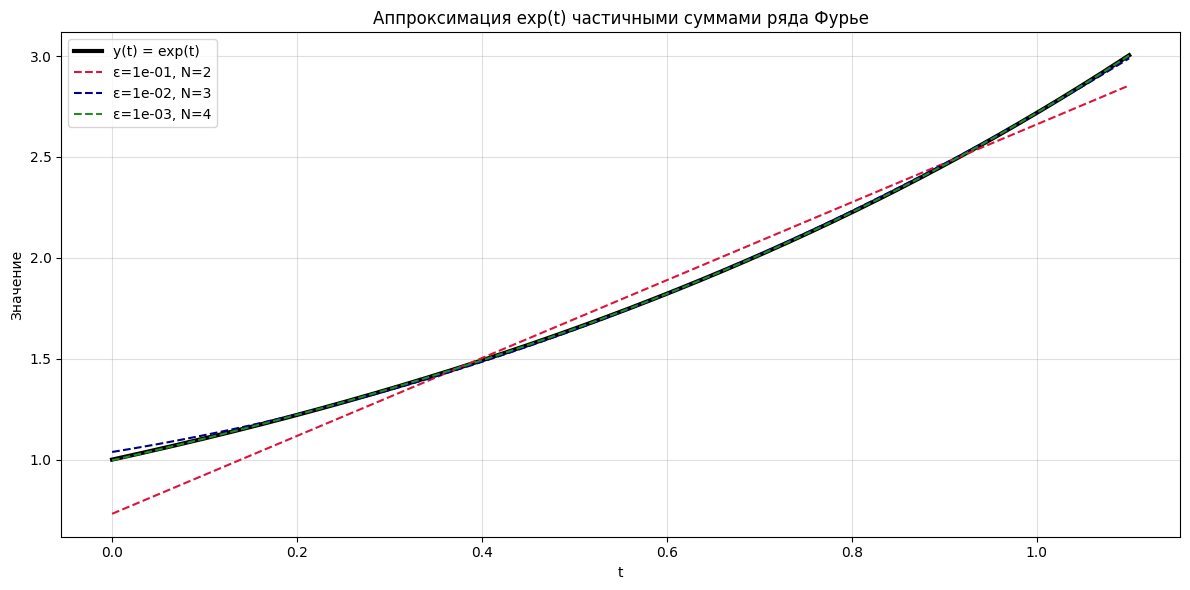

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(t_points, y_values, 'k', lw=3, label='y(t) = exp(t)')
colors = ['crimson', 'navy', 'forestgreen']

for i, tol in enumerate(accuracy):
    terms, error, basis, coeffs = results[tol]
    values = [partial_sum(t, basis, coeffs) for t in t_points]
    plt.plot(t_points, values, '--', color=colors[i], label=f'ε={tol:.0e}, N={terms}')

plt.xlabel('t')
plt.ylabel('Значение')
plt.title('Аппроксимация exp(t) частичными суммами ряда Фурье')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()


plt.savefig("plot.png")
plt.show()

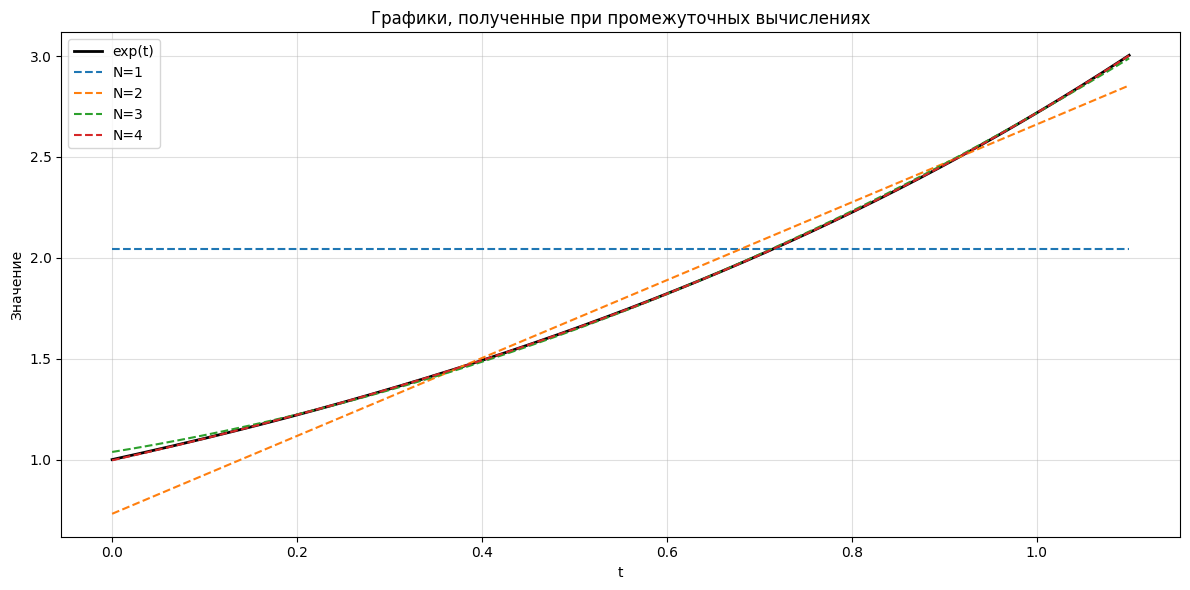

In [16]:
max_terms = max(results[tol][0] for tol in accuracy)
plt.figure(figsize=(12, 6))

plt.plot(t_points, y_values, 'k', lw=2, label='exp(t)')
for i in range(1, max_terms + 1):
    basis = process_gram_schmidt(i)
    coeffs = get_fourier_coeffs(basis)
    values = [partial_sum(t, basis, coeffs) for t in t_points]
    plt.plot(t_points, values, '--', label=f'N={i}')

plt.xlabel('t')
plt.ylabel('Значение')
plt.title('Графики, полученные при промежуточных вычислениях')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()

plt.savefig("plot2.png")
plt.show()